In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as  plt
import seaborn as nsn    


In [10]:
df = pd.read_csv("Pearson.txt")
print(df.head())

  Father\tSon
0  65.0\t59.8
1  63.3\t63.2
2  65.0\t63.3
3  65.8\t62.8
4  61.1\t64.3


In [16]:
new = df['Father\tSon'].str.split('\t', expand = True)


In [17]:
new.columns = ['Fathers', 'Son']
new

,Fathers,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [20]:
new_1 = new.copy().astype(float)
new_1

,Fathers,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [25]:
new_1['Result'] = new_1["Fathers"].div(new_1["Son"].values)
new_1

,Fathers,Son,Result
0,65.0,59.8,1.086957
1,63.3,63.2,1.001582
2,65.0,63.3,1.026856
3,65.8,62.8,1.047771
4,61.1,64.3,0.950233
...,...,...,...
1073,67.0,70.8,0.946328
1074,71.3,68.3,1.043924
1075,71.8,69.3,1.036075
1076,70.7,69.3,1.020202


In [26]:
new_1.isnull().sum()

Fathers    0
Son        0
Result     0
dtype: int64

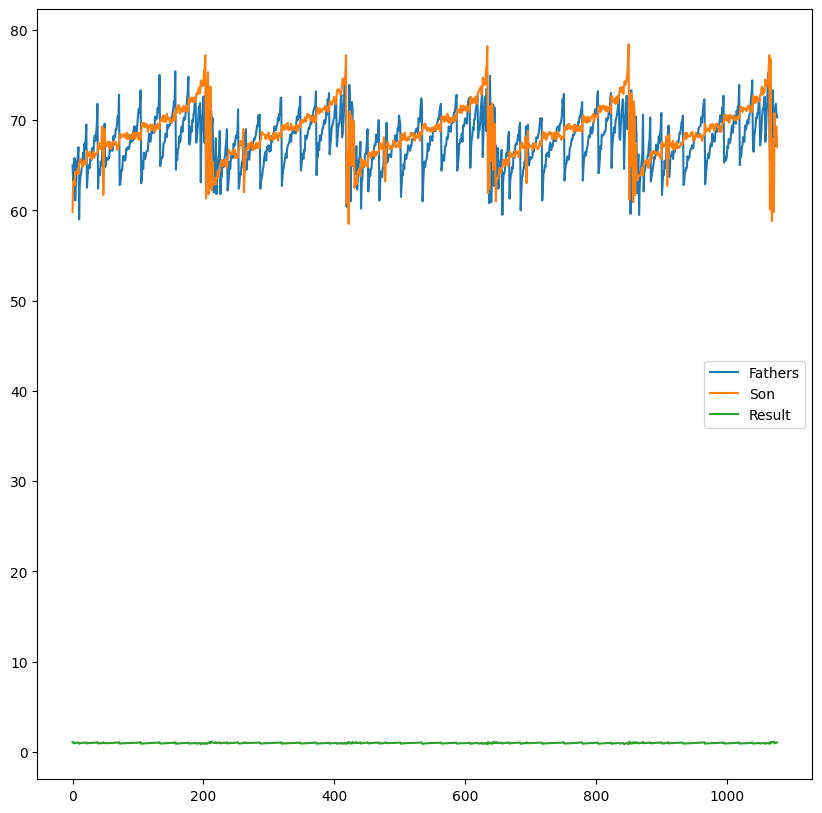

In [37]:
plt.figure(figsize=(10,10))
plt.plot(new_1)
plt.legend(['Fathers', 'Son','Result'], loc='right')

In [41]:
sns.displot(new_1['Fathers'])

NameError: name 'sns' is not defined